##  Import Libraries and Load Data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve



In [4]:

# Load dataset
data_path = '../data/telco_customer_churn.csv'
data = pd.read_csv(data_path)
data.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
#  Data Exploration
print("Basic Information:")
print(data.info())
print("\nSummary Statistics:")
print(data.describe())

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 

In [45]:

##Check for Missing Values
missing_values = data.isnull().sum()
print("Missing Values per Column:")
print(missing_values)

Missing Values per Column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [8]:
# 4. Handle Missing Values
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

In [10]:
# Ensure the columns for correlation are numeric and handle any non-numeric values
# Convert 'TotalCharges' to numeric, with errors='coerce' to handle non-numeric values
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Check if there are any missing values after conversion
missing_values = data[['tenure', 'MonthlyCharges', 'TotalCharges']].isnull().sum()
print("Missing values after conversion:")
print(missing_values)

# Fill missing values with median in the 'TotalCharges' column (if any)
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

Missing values after conversion:
tenure            0
MonthlyCharges    0
TotalCharges      0
dtype: int64


In [49]:
## Univariate Analysis (Distribution of Key Features)

Text(0.5, 1.0, 'Distribution of Tenure')

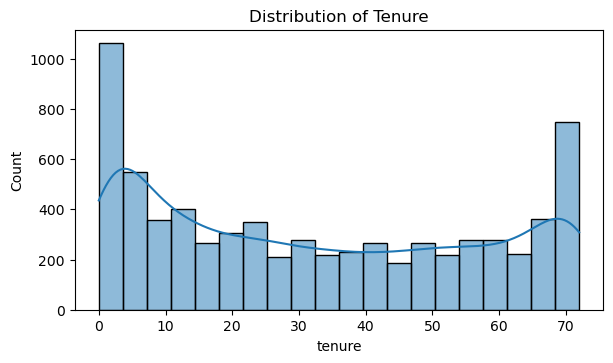

In [12]:
plt.figure(figsize=(15, 8))

plt.subplot(2, 2, 1)
sns.histplot(data['tenure'], kde=True, bins=20)
plt.title('Distribution of Tenure')

Text(0.5, 1.0, 'Distribution of Monthly Charges')

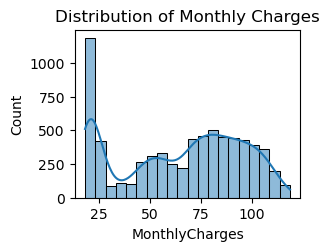

In [14]:
plt.subplot(2, 2, 2)
sns.histplot(data['MonthlyCharges'], kde=True, bins=20)
plt.title('Distribution of Monthly Charges')

Text(0.5, 1.0, 'Distribution of Total Charges')

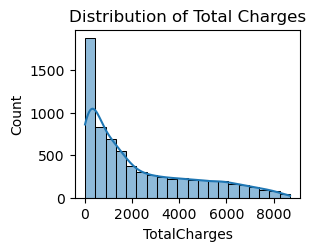

In [16]:
plt.subplot(2, 2, 3)
sns.histplot(data['TotalCharges'], kde=True, bins=20)
plt.title('Distribution of Total Charges')

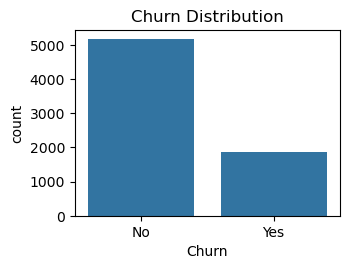

In [81]:
plt.subplot(2, 2, 4)
sns.countplot(x='Churn', data=data)
plt.title('Churn Distribution')
plt.tight_layout()
plt.show()

## Bivariate Analysis (Relationship between Features)

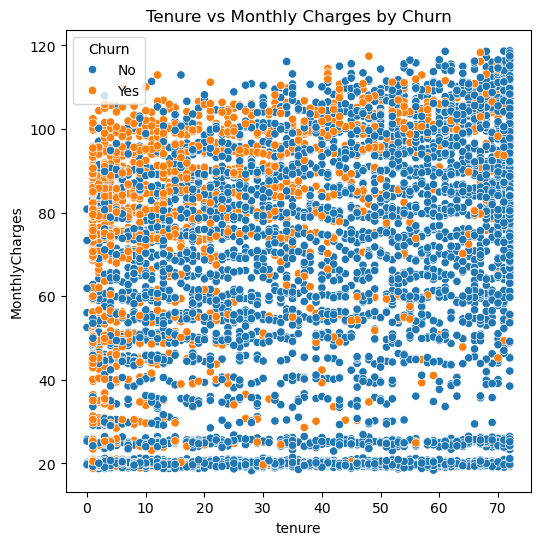

In [18]:
# Tenure vs MonthlyCharges, colored by Churn
plt.figure(figsize=(6, 6))
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=data)
plt.title('Tenure vs Monthly Charges by Churn')
plt.show()

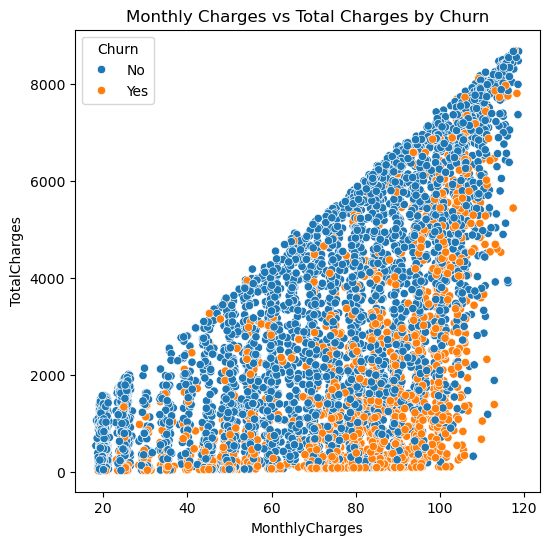

In [20]:
# MonthlyCharges vs TotalCharges, colored by Churn
plt.figure(figsize=(6, 6))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', hue='Churn', data=data)
plt.title('Monthly Charges vs Total Charges by Churn')
plt.show()

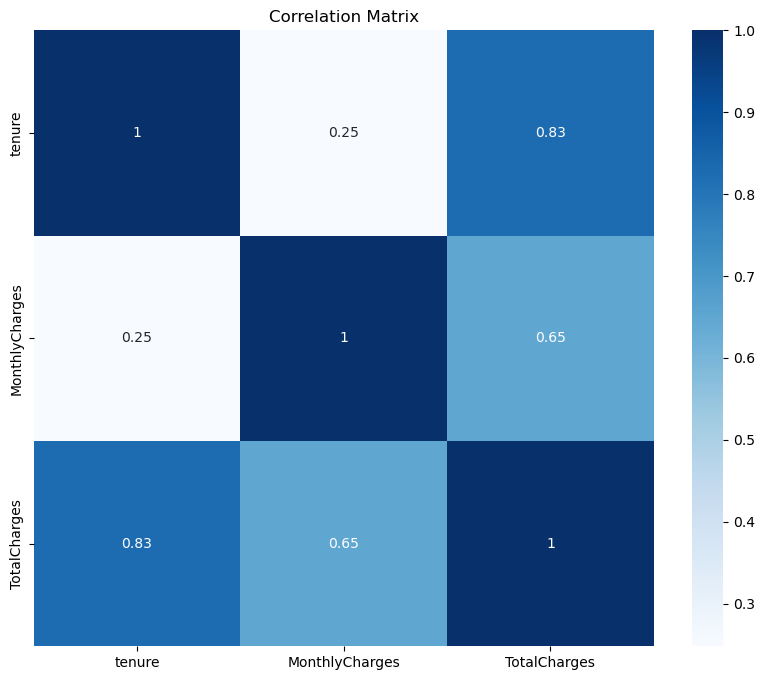

In [22]:
# Correlation Matrix (Numerical Features Only)
plt.figure(figsize=(10, 8))
correlation_matrix = data[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Correlation Matrix')
plt.show()

In [24]:
# Encode Categorical Features
data = pd.get_dummies(data, drop_first=True)

In [26]:
# Split the Dataset into Features and Target Variable
X = data.drop('Churn_Yes', axis=1)
y = data['Churn_Yes']

## Handle Outliers

In [28]:
# Function to identify outliers using IQR
def detect_outliers_iqr(data, feature):
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]




In [30]:
# Identify outliers for MonthlyCharges
outliers_monthly_charges = detect_outliers_iqr(data, 'MonthlyCharges')
print(f'Outliers in MonthlyCharges: {len(outliers_monthly_charges)}')



Outliers in MonthlyCharges: 0


In [32]:
# Identify outliers for Tenure
outliers_tenure = detect_outliers_iqr(data, 'tenure')
print(f'Outliers in Tenure: {len(outliers_tenure)}')

Outliers in Tenure: 0


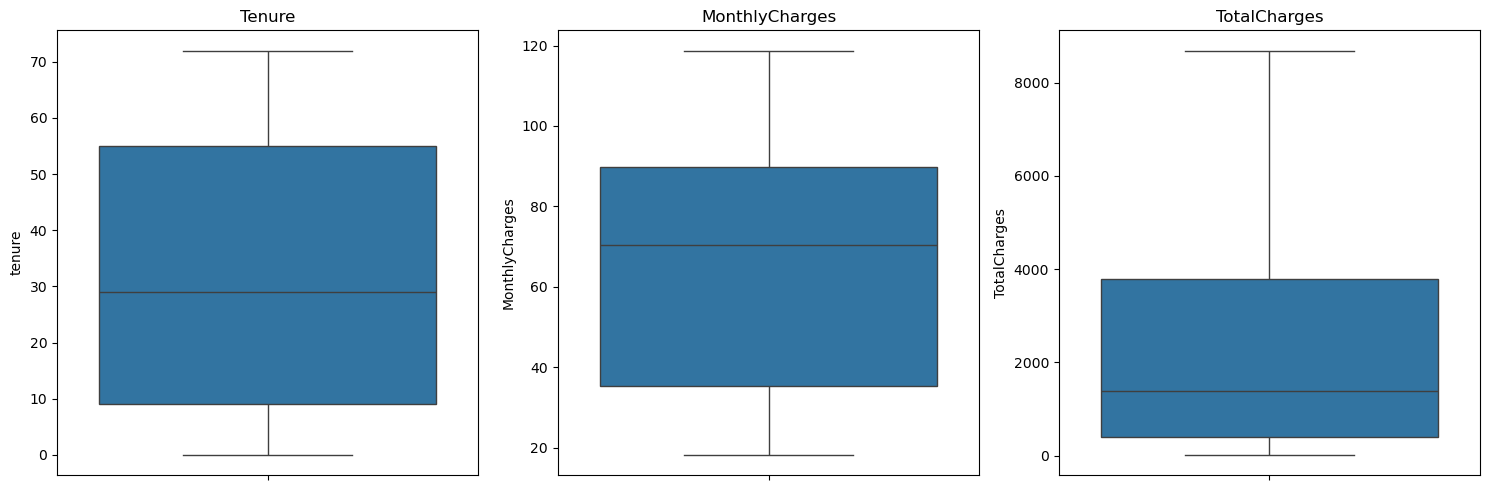

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of numeric features
plt.figure(figsize=(15, 5))

# Tenure distribution
plt.subplot(1, 3, 1)
sns.boxplot(data['tenure'])
plt.title('Tenure')

# MonthlyCharges distribution
plt.subplot(1, 3, 2)
sns.boxplot(data['MonthlyCharges'])
plt.title('MonthlyCharges')

# TotalCharges distribution
plt.subplot(1, 3, 3)
sns.boxplot(data['TotalCharges'])
plt.title('TotalCharges')

plt.tight_layout()
plt.show()


## Data Preprocessing

In [36]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 12. Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Model Building and Training

In [38]:
# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions on test set
y_pred = model.predict(X_test_scaled)

# Performance evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[1437  102]
 [ 318  256]]
              precision    recall  f1-score   support

       False       0.82      0.93      0.87      1539
        True       0.72      0.45      0.55       574

    accuracy                           0.80      2113
   macro avg       0.77      0.69      0.71      2113
weighted avg       0.79      0.80      0.78      2113



ROC-AUC Score: 0.8485435585350006


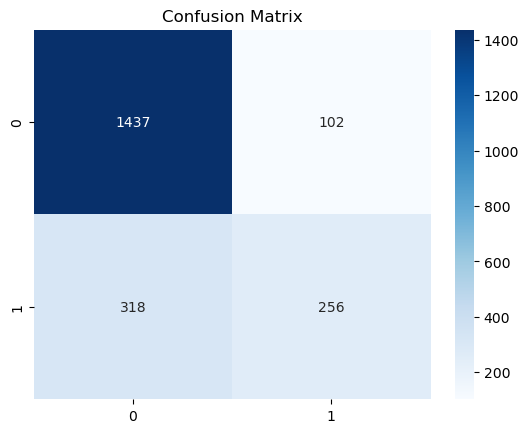

In [40]:
# ROC-AUC score
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test_scaled)[:, 1])
print(f'ROC-AUC Score: {roc_auc}')

# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


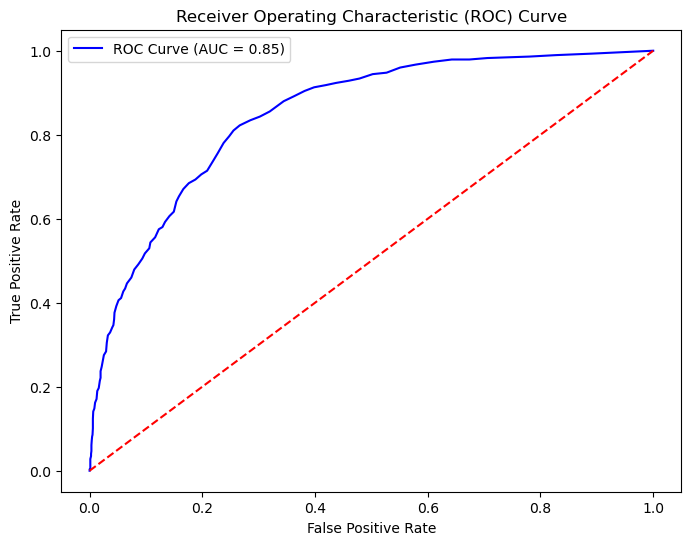

In [42]:
## Plot AUC-ROC Curve
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='blue')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

## try other classification algothrims

In [44]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve


In [46]:
import os

# Create output directory if it doesn't exist
output_path = '../output'
if not os.path.exists(output_path):
    os.makedirs(output_path)

# Define a function to train models, get ROC-AUC curves, and save plots
def plot_roc_curve_and_save(model, X_test, y_test, model_name, output_file):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.legend()

    # Save the plot
    plt.savefig(os.path.join(output_path, output_file))

##  Train and Evaluate Other  Models

In [48]:
##Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [50]:
# 10.2 Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train_scaled, y_train)



LogisticRegression(random_state=42)

In [ ]:
# 10.3 Support Vector Machine (SVM) with probability enabled
##svm_model = SVC(probability=True, random_state=42)
##svm_model.fit(X_train_scaled, y_train)

# SVM with linear kernel for faster performance
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

In [52]:
# 10.4 Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [54]:
#  Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_scaled, y_train)

GaussianNB()

In [56]:
# XGBoost Classifier
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_scaled, y_train)

C:\Users\Himanshu\anaconda3\envs\customer-segmentation-env\lib\site-packages\xgboost\core.py:158: UserWarning: [20:57:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [58]:
# 8.7 Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled, y_train)

GradientBoostingClassifier(random_state=42)

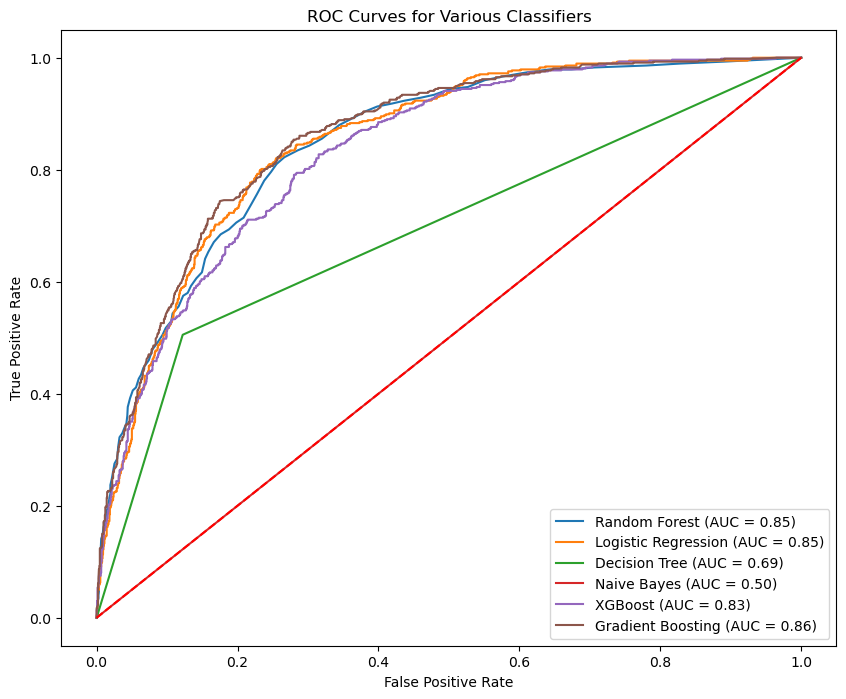

In [60]:
# 9. Plot ROC-AUC Curves for All Models and Save Plots
plt.figure(figsize=(10, 8))

# Random Forest
plot_roc_curve_and_save(rf_model, X_test_scaled, y_test, "Random Forest", "roc_random_forest.png")

# Logistic Regression
plot_roc_curve_and_save(lr_model, X_test_scaled, y_test, "Logistic Regression", "roc_logistic_regression.png")

# SVM
##plot_roc_curve_and_save(svm_model, X_test_scaled, y_test, "SVM (Linear Kernel)", "roc_svm.png")

# Decision Tree
plot_roc_curve_and_save(dt_model, X_test_scaled, y_test, "Decision Tree", "roc_decision_tree.png")

# Naive Bayes
plot_roc_curve_and_save(nb_model, X_test_scaled, y_test, "Naive Bayes", "roc_naive_bayes.png")

# XGBoost
plot_roc_curve_and_save(xgb_model, X_test_scaled, y_test, "XGBoost", "roc_xgboost.png")

# Gradient Boosting
plot_roc_curve_and_save(gb_model, X_test_scaled, y_test, "Gradient Boosting", "roc_gradient_boosting.png")

# Plot random guess (diagonal line) and save the overall ROC plot
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Various Classifiers')
plt.legend()
plt.savefig(os.path.join(output_path, 'roc_all_models.png'))  # Save the combined ROC plot
plt.show()



## Explanation for Choosing Random Forest:

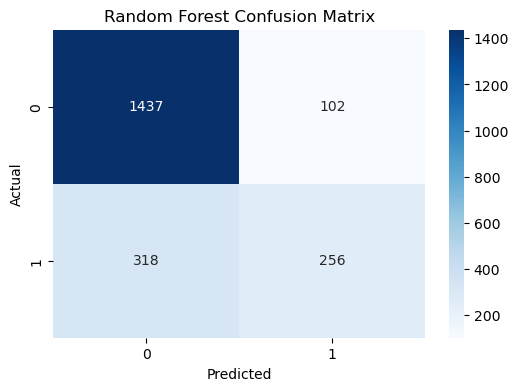

In [62]:
# Predict using the trained Random Forest model
y_pred_rf = rf_model.predict(X_test_scaled)

# Plot and save the confusion matrix for Random Forest
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig(os.path.join(output_path, 'random_forest_confusion_matrix.png'))  # Save the plot
plt.show()


## Feature Importance in Random Forest

Top 10 Important Features in Random Forest:
                             Feature  Importance
3                       TotalCharges    0.107405
1                             tenure    0.095239
2                     MonthlyCharges    0.083209
7070  PaymentMethod_Electronic check    0.027814
7052     InternetService_Fiber optic    0.023240
7055              OnlineSecurity_Yes    0.021548
7067               Contract_Two year    0.018883
7061                 TechSupport_Yes    0.017920
7068            PaperlessBilling_Yes    0.017473
7046                     gender_Male    0.016257


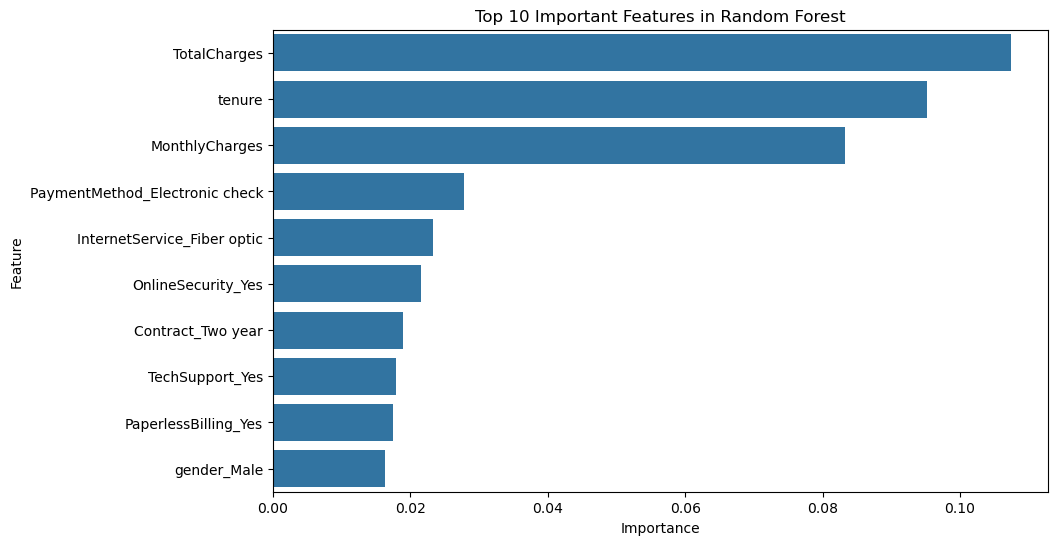

In [64]:
# Train the Random Forest model (if not already done)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Get feature importance from the trained model
importances = rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for better readability
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
print("Top 10 Important Features in Random Forest:")
print(feature_importance_df.head(10))

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Important Features in Random Forest')
# Save the plot before showing it
plt.savefig(os.path.join(output_path, 'random_forest_feature_importance.png'))
plt.show()




## Final Analysis

## Check for Overfitting in Random Forest

In [66]:
# 1. Compute Accuracy or AUC on Training Set
y_train_pred_rf = rf_model.predict(X_train_scaled)
train_accuracy = rf_model.score(X_train_scaled, y_train)
print(f"Training Accuracy for Random Forest: {train_accuracy:.4f}")

# 2. Compute Accuracy or AUC on Test Set
y_test_pred_rf = rf_model.predict(X_test_scaled)
test_accuracy = rf_model.score(X_test_scaled, y_test)
print(f"Test Accuracy for Random Forest: {test_accuracy:.4f}")

# 3. Compare Training and Test Accuracy
if train_accuracy > test_accuracy:
    print(f"The model might be overfitting (Train Accuracy: {train_accuracy:.4f} vs Test Accuracy: {test_accuracy:.4f})")
else:
    print("The model shows no significant signs of overfitting.")


Training Accuracy for Random Forest: 1.0000
Test Accuracy for Random Forest: 0.8012
The model might be overfitting (Train Accuracy: 1.0000 vs Test Accuracy: 0.8012)


## Cross-Validation to Detect Overfitting

In [109]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}")


Cross-Validation Accuracy Scores: [0.79614604 0.80121704 0.78600406 0.78803245 0.78803245]
Mean Cross-Validation Accuracy: 0.7919


## Interpretation:
The cross-validation accuracy scores show consistent performance across the different validation folds, with values ranging between 0.7860 and 0.8012. This suggests that your model's performance is relatively stable and does not vary too much depending on the subset of data used for training and testing.

A mean cross-validation accuracy of 0.7919 indicates that your model is correctly predicting the outcome about 79% of the time on unseen data, which is a decent performance.

## Plot Learning Curves:
You can plot learning curves to visualize overfitting by comparing training and validation performance over different numbers of training examples.

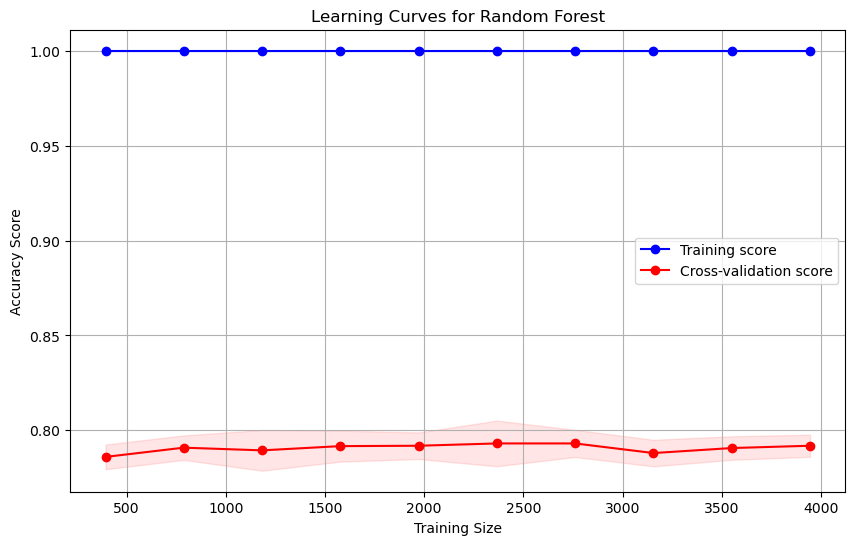

In [68]:
from sklearn.model_selection import learning_curve

# Generate learning curves
train_sizes, train_scores, test_scores = learning_curve(
    rf_model, X_train_scaled, y_train, cv=5, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate mean and standard deviation for training and validation scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training score')
plt.plot(train_sizes, test_mean, 'o-', color='red', label='Cross-validation score')

# Plot the std deviation as a shaded area
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='red')

plt.title('Learning Curves for Random Forest')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.grid(True)
plt.savefig(os.path.join(output_path, 'Learning Curves.png'))  # Save the combined ROC plot
plt.show()


## Interpretation of the Learning Curve:
Training Accuracy:

The blue line, representing the training score, is consistently at 1.00 (100% accuracy), which indicates that the model is perfectly fitting the training data.
This is a sign that the model is likely overfitting because it is performing perfectly on the training data but may not generalize well to unseen data.


Cross-Validation Accuracy:
The red line, representing the cross-validation score, hovers around 0.79 (79% accuracy), which is significantly lower than the training score.
The gap between the training score (1.00) and the cross-validation score (0.79) shows that the model's performance drops significantly when applied to unseen data, another strong indicator of overfitting.


Shaded Region (Variance):
The shaded region around the cross-validation curve represents the variance in the cross-validation score across different folds.
Since the variance is small, it suggests that the model's performance is consistent across different cross-validation folds, but the generalization gap still exists.

Conclusion:
Overfitting is Present: The model is overfitting the training data, as it achieves perfect training accuracy but lower cross-validation accuracy. This indicates that the model is not generalizing well to unseen data.

## Tuning Random Forest:

In [72]:
# Tuning the Random Forest model to reduce overfitting
rf_model_tuned = RandomForestClassifier(
    random_state=42,
    max_depth=10,           # Limit the depth of the trees
    min_samples_split=10,   # Increase the minimum number of samples to split
    min_samples_leaf=5,     # Increase the minimum number of samples per leaf
    n_estimators=100        # Number of trees in the forest
)

# Fit the tuned model
rf_model_tuned.fit(X_train_scaled, y_train)

# Evaluate the tuned model
train_accuracy_tuned = rf_model_tuned.score(X_train_scaled, y_train)
test_accuracy_tuned = rf_model_tuned.score(X_test_scaled, y_test)

print(f"Tuned Training Accuracy: {train_accuracy_tuned:.4f}")
print(f"Tuned Test Accuracy: {test_accuracy_tuned:.4f}")


Tuned Training Accuracy: 0.7373
Tuned Test Accuracy: 0.7283


## Tune Hyperparameters Further  using Random SearchCV

In [78]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distribution
param_dist = {
    'n_estimators': randint(100, 300),
    'max_depth': randint(10, 30),
    'min_samples_split': randint(5, 15),
    'min_samples_leaf': randint(1, 5)
}

# Perform randomized search with 20 iterations
random_search = RandomizedSearchCV(RandomForestClassifier(random_state=42), 
                                   param_distributions=param_dist, 
                                   n_iter=20,  # Number of random combinations to try
                                   cv=5, 
                                   scoring='accuracy', 
                                   random_state=42)

random_search.fit(X_train_scaled, y_train)

# Best parameters from the random search
print(f"Best parameters: {random_search.best_params_}")

# Evaluate the model with the best parameters
best_rf_model = random_search.best_estimator_
test_accuracy_best = best_rf_model.score(X_test_scaled, y_test)
print(f"Test Accuracy with Best Parameters: {test_accuracy_best:.4f}")


Best parameters: {'max_depth': 21, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 158}
Test Accuracy with Best Parameters: 0.7719


 Based on the results of RandomizedSearchCV, the best parameters for your Random Forest model are:

max_depth: 21
min_samples_leaf: 1
min_samples_split: 5
n_estimators: 158
Test Accuracy:
The Test Accuracy with these parameters is 0.7719 (77.19%), which is an improvement over the earlier tuned model accuracy of 72.83%.

## Feature Importance:

Top 10 Important Features:
                                   Feature  Importance
3                             TotalCharges    0.093482
1                                   tenure    0.080770
7070        PaymentMethod_Electronic check    0.065410
7052           InternetService_Fiber optic    0.047819
7067                     Contract_Two year    0.045127
2                           MonthlyCharges    0.039441
7061                       TechSupport_Yes    0.030726
7058  DeviceProtection_No internet service    0.030254
7060       TechSupport_No internet service    0.025481
7068                  PaperlessBilling_Yes    0.023814


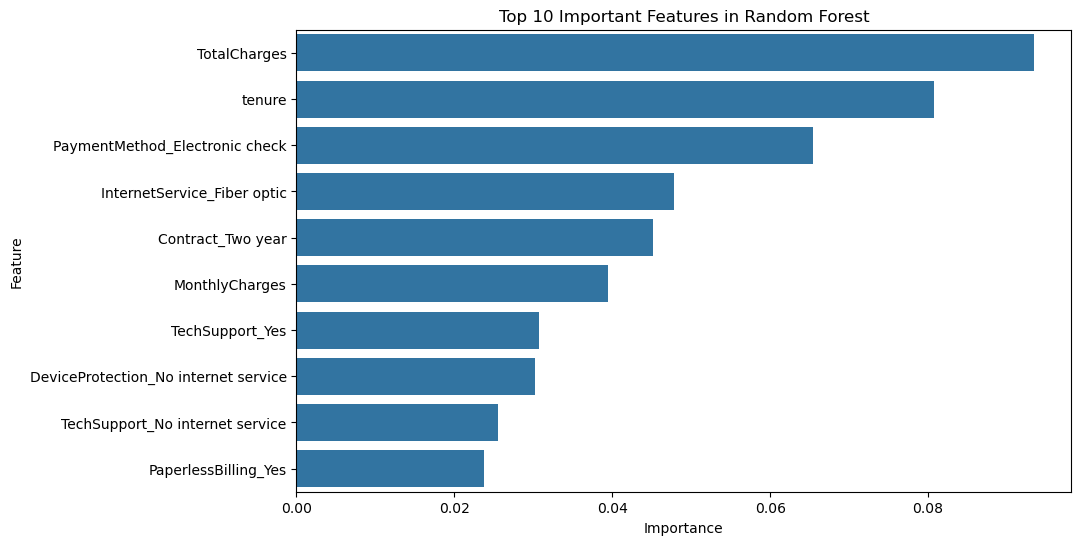

In [82]:
# Get feature importance from the tuned model
importances = best_rf_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for better readability
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display and plot the top 10 important features
print("Top 10 Important Features:")
print(feature_importance_df.head(10))

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('Top 10 Important Features in Random Forest')
plt.show()


## Confusion Matrix of Tuned Model

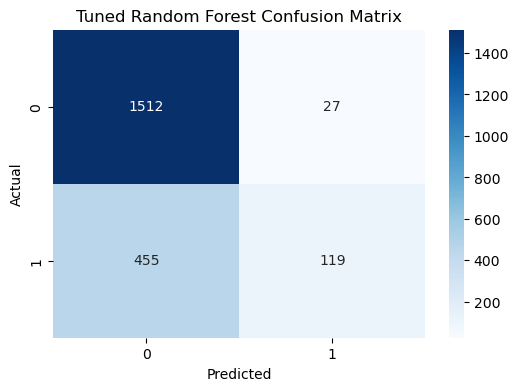

In [85]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict with the tuned model
y_pred_tuned = best_rf_model.predict(X_test_scaled)

# Plot and save the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_tuned), annot=True, fmt='d', cmap='Blues')
plt.title('Tuned Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig(os.path.join(output_path, 'tuned_random_forest_confusion_matrix.png'))
plt.show()

Cross Validation

In [91]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(best_rf_model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}")


Cross-Validation Accuracy Scores: [0.75760649 0.76673428 0.7515213  0.76977688 0.76267748]
Mean Cross-Validation Accuracy: 0.7617


## Cross-Validation Summary:
Mean Accuracy: 76.17%, indicating consistent performance across different data subsets.

Test Accuracy: 77.19%, slightly higher than cross-validation, which is within an acceptable range.

Consistency: Cross-validation scores (0.7515 to 0.7698) show low variance, suggesting stable model performance.

In [93]:
from sklearn.metrics import classification_report, roc_auc_score

# Evaluate on test set
y_pred_tuned = best_rf_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred_tuned))

# ROC-AUC Score
y_pred_proba_tuned = best_rf_model.predict_proba(X_test_scaled)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_proba_tuned)
print(f"ROC-AUC Score: {auc_score:.4f}")


              precision    recall  f1-score   support

       False       0.77      0.98      0.86      1539
        True       0.82      0.21      0.33       574

    accuracy                           0.77      2113
   macro avg       0.79      0.59      0.60      2113
weighted avg       0.78      0.77      0.72      2113

ROC-AUC Score: 0.8481


## Classification Report Summary:
Accuracy (0.77): The model performs reasonably well, aligning with test and cross-validation results.
    
Non-Churn Class: High precision (0.77), recall (0.98), and F1-score (0.86), indicating strong performance for predicting non-churn customers.
    
Churn Class: Precision is good (0.82), but recall is low (0.21), meaning the model struggles to correctly identify churned customers (many false negatives).

Class Imbalance: The low recall for churn likely results from the class imbalance (more non-churn customers than churn customers).

ROC-AUC (0.8481): The model has good discriminatory power overall but is biased toward the non-churn class.

## Further Improvement :
Class Imbalance: Use class weights or SMOTE to improve recall for the churn class.

Threshold Tuning: Lower the decision threshold (e.g., to 0.4) to capture more churned customers.

Hyperparameter Tuning: Further tune parameters with RandomizedSearchCV or GridSearchCV.

Other Models: Try Gradient Boosting or XGBoost or neural network for potentially better performance.